### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Сатлихана Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### **Вариант** **8**
- Breast Cancer Wisconsin (Diagnostic) Data Set
- Название файла: wdbc.data
- Ссылка: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- Класс: Outcome (столбец No 1)
- Зависимая переменная: area (столбец No 6)
- Метод обработки пропущенных значений – среднее значение класса
- Метод обработки выбросов – стандартизованная оценка (Z-score)
- Метод снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier)

Регрессоры:
  - Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5
  - регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5  
  - регрессии на основе метода ближайших соседей (KNeighborsRegressor), параметр n_neighbors в диапазоне от 1 до 5

Показатели качества регрессии:
  - Для определения лучшего регрессора MAE
  - Для визуализации кривой обучения MSLE





In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [153]:
import pandas as pd

path = '/content/drive/MyDrive/University/Viti IV/1 SEMESTER/Интеллектуальный анализ данных/Lab 7/wdbc.data'
data = pd.read_csv(path, header=None)

# Извлечение класса (Outcome) — столбец No 1 (индексация с 0)
outcome = data[1]
print("\nКласс: Outcome (столбец No 1):")
print(outcome.head())
# Извлечение зависимой переменной (area)
area = data[6]
print("\nЗависимая переменная: area (столбец No 6):")
print(area.head())



Класс: Outcome (столбец No 1):
0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object

Зависимая переменная: area (столбец No 6):
0    0.11840
1    0.08474
2    0.10960
3    0.14250
4    0.10030
Name: 6, dtype: float64


2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.

In [154]:
#  'M' и 'B' в числовые значения: M -> 1, B -> 0
data[1] = data[1].map({'M': 1, 'B': 0})

# результат преобразования столбца Outcome
print("Столбец Outcome после преобразования меток классов:")
print(data[1].head())


Столбец Outcome после преобразования меток классов:
0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64


In [155]:
# наличие пропущенных значений в столбцах Outcome (столбец No 1) и area (столбец No 6)
missing_values_outcome = data[1].isna().sum()
missing_values_area = data[6].isna().sum()

print(f"Пропущенные значения в столбце Outcome: {missing_values_outcome}")
print(f"Пропущенные значения в столбце area: {missing_values_area}")

Пропущенные значения в столбце Outcome: 0
Пропущенные значения в столбце area: 0


In [156]:
# Удаление записей с пропущенными значениями в этих столбцах
data_cleaned = data.dropna(subset=[1, 6])

# только числовые признаки
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])
print("Данные после обработки:")
print(numerical_data.head())

Данные после обработки:
         0   1      2      3       4       5        6        7       8   \
0    842302   1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517   1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903   1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301   1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402   1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.1189

3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.


In [157]:
# Проверка на наличие пропущенных значений
if numerical_data.isnull().sum().sum() > 0:
    print("Пропущенные значения обнаружены. Заменим их на средние значения по классам.")
    for column in numerical_data.columns:
        numerical_data[column] = numerical_data.groupby(1)[column].transform(lambda x: x.fillna(x.mean()))
else:
    print("Пропущенные значения отсутствуют. Проверяем на наличие выбросов.")


Пропущенные значения отсутствуют. Проверяем на наличие выбросов.


In [158]:
import numpy as np

In [159]:
# Определение Z-score
z_scores = np.abs((numerical_data - numerical_data.mean()) / numerical_data.std())
# Определение порога для Z-score
threshold = 3
# Определение выбросов
outliers = (z_scores > threshold).any(axis=1)
# Удаление выбросов
outlier_count = outliers.sum()
total_count = len(numerical_data)
min_outliers = total_count * 0.05  # 5% от общего числа точек
if outlier_count >= min_outliers:
  numerical_data = numerical_data[~outliers]
  print(f"Удалены выбросы. Оставшиеся данные: {len(numerical_data)} записей.")
else:
    print("Количество выбросов меньше 5%. Не удаляем выбросы.")
print("Итоговые данные:")
print(numerical_data.head())

Удалены выбросы. Оставшиеся данные: 487 записей.
Итоговые данные:
         0   1      2      3       4       5        6        7       8   \
1    842517   1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903   1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
4  84358402   1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
5    843786   1  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   
6    844359   1  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.1127   

        9   ...     22     23     24      25      26      27      28      29  \
1  0.07017  ...  24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.5  1709.0  0.1444  0.4245  0.4504  0.2430   
4  0.10430  ...  22.54  16.67  152.2  1575.0  0.1374  0.2050  0.4000  0.1625   
5  0.08089  ...  15.47  23.75  103.4   741.6  0.1791  0.5249  0.5355  0.1741   
6  0.07400  ...  22.88  27.66  153.2  1606.0  0.1442  0.2576  0.3784  0.1932   

  

4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.

In [160]:
from sklearn.preprocessing import MinMaxScaler

# Масштабирование признаков в диапазон [0, 1]
scaler = MinMaxScaler()  # Создается объект MinMaxScaler
scaled_data = scaler.fit_transform(numerical_data)  # Применяется масштабирование к данным
# Преобразование обратно в DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numerical_data.columns)


In [161]:
from sklearn.ensemble import ExtraTreesClassifier

# Подготовка данных для выбора признаков
X = scaled_data.drop(columns=[1])
y = outcome[data.index[~outliers]]

# Обучение ExtraTreesClassifier для определения важности признаков
model = ExtraTreesClassifier(random_state=42)  # Создается объект модели
model.fit(X, y)  # Модель обучается на подготовленных данных
# Получение важностей признаков
importances = model.feature_importances_  # Извлекаются важности признаков из обученной модели
# Создание DataFrame для важности признаков
importance_df = pd.DataFrame({'Признак': X.columns, 'Важность': importances})  # Создается DataFrame с признаками и их важностью
# Фильтрация признаков с более чем 50 уникальными значениями
filtered_features = X.columns[X.nunique() > 50]  # Отбираются признаки с более чем 50 уникальными значениями
# Сортировка признаков по важности
top_features = importance_df[importance_df['Признак'].isin(filtered_features)]
top_features = top_features.sort_values(by='Важность', ascending=False).head(3)
# Выбор топ-3 признаков
selected_features = top_features.head(3)['Признак'].tolist()

In [162]:
final_data = scaled_data[selected_features]
print("Выбранные признаки:")
print(final_data.head())

Выбранные признаки:
         29        25        2 
0  0.688634  0.798449  0.834244
1  0.899667  0.687077  0.780220
2  0.601629  0.626657  0.817054
3  0.644576  0.250879  0.335748
4  0.715291  0.640635  0.691817


5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


In [163]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

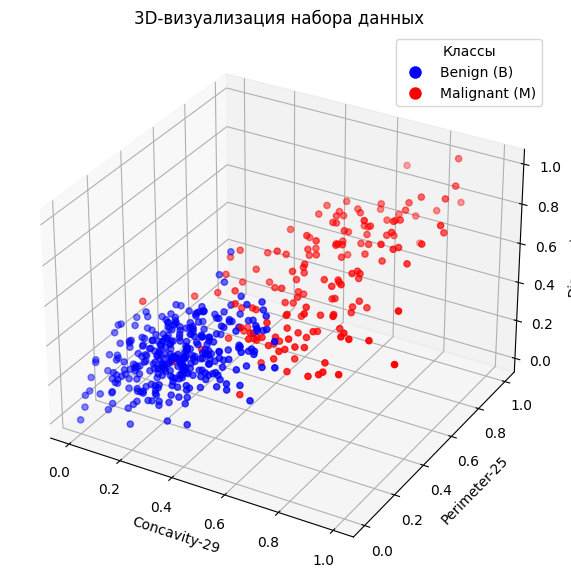

In [164]:
plot_data = scaled_data[selected_features].copy()
plot_data['Outcome'] = data[1][data.index[~outliers]].values
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = {0: 'blue', 1: 'red'}  # 'B' -> blue, 'M' -> red
scatter = ax.scatter(plot_data[selected_features[0]],
                     plot_data[selected_features[1]],
                     plot_data[selected_features[2]],
                     c=plot_data['Outcome'].map(colors),
                     marker='o')
ax.set_xlabel('Concavity-29')
ax.set_ylabel('Perimeter-25')
ax.set_zlabel('Diagnosis-2')
plt.title('3D-визуализация набора данных')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Benign (B)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Malignant (M)')]
plt.legend(handles=handles, title="Классы", loc='upper right')
plt.show()


6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

Регрессоры:

- Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5
- регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5
- регрессии на основе метода ближайших соседей (KNeighborsRegressor), параметр n_neighbors в диапазоне от 1 до 5

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [166]:
X = final_data
y = data[1][data.index[~outliers]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (340, 3)
Размер тестовой выборки: (147, 3)


## Полиномиальная регрессия (PolynomialFeatures+LinearRegression)

In [167]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

param_grid_poly = {'poly__degree': [2, 3, 4, 5]}
grid_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_poly.fit(X_train, y_train)

best_poly_model = grid_poly.best_estimator_
optimal_params_poly = grid_poly.best_params_
print("Полиномиальная регрессия:")
print("Лучшие параметры:", optimal_params_poly)

Полиномиальная регрессия:
Лучшие параметры: {'poly__degree': 2}


## Pегрессия эластичная сеть (ElasticNet)

In [168]:
import warnings
warnings.filterwarnings("ignore")

elastic_pipeline = Pipeline([
    ('elastic', ElasticNet())
])
param_grid_elastic = {
    'elastic__alpha': [0.1, 0.5, 1.0],
    'elastic__l1_ratio': [0.1, 0.5, 1.0]
}
grid_elastic = GridSearchCV(elastic_pipeline, param_grid_elastic, cv=5, error_score='raise')
grid_elastic.fit(X_train, y_train)
best_elastic_model = grid_elastic.best_estimator_
optimal_params_elastic = grid_elastic.best_params_
print("Лучшие параметры для эластичной сети:", optimal_params_elastic)
print("Лучший результат эластичной сети:", grid_elastic.best_score_)

Лучшие параметры для эластичной сети: {'elastic__alpha': 0.1, 'elastic__l1_ratio': 0.1}
Лучший результат эластичной сети: 0.43642487629924814


## Pегрессии на основе метода ближайших соседей (KNeighborsRegressor)

In [169]:
knn_pipeline = Pipeline([
    ('knn', KNeighborsRegressor())
])
param_grid_knn = {
    'knn__n_neighbors': [1, 2, 3, 4, 5]
}
grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)
best_knn_model = grid_knn.best_estimator_
optimal_params_knn = grid_knn.best_params_
print("\nРегрессия на основе метода ближайших соседей:")
print("Лучшие параметры:", optimal_params_knn)


Регрессия на основе метода ближайших соседей:
Лучшие параметры: {'knn__n_neighbors': 5}


7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.


In [170]:
from sklearn.metrics import mean_absolute_error

In [171]:
# Определение функции для визуализации результатов регрессии для заданного признака
def plot_regression_results(X_train_feature, y_train, X_test_feature, y_test, feature_name, target_name, models, model_names):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_feature, y_train, color='blue', label='Обучающие Данные', alpha=0.6)
    x_range = np.linspace(X_train_feature.min(), X_train_feature.max(), 100).reshape(-1, 1)
    maes = {}

    for model, name in zip(models, model_names):
        # Обучение модели на обучающих данных
        model.fit(X_train_feature, y_train)
        y_pred_range = model.predict(x_range)
        test_pred = model.predict(X_test_feature)
        mae = mean_absolute_error(y_test, test_pred)
        maes[name] = mae
        plt.plot(x_range, y_pred_range, label=name, linestyle='--')
    # Выделение лучшей модели красным цветом
    best_model_name = min(maes, key=maes.get)
    best_mae = maes[best_model_name]

    plt.plot(x_range, models[model_names.index(best_model_name)].predict(x_range),
             color='red', linewidth=2, label=f'Лучшая Модель: {best_model_name} (MAE: {best_mae:.3f})')
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.title('Результаты Регрессии')
    plt.legend()
    plt.grid(True)
    plt.show()


Построение результатов для признака: 29


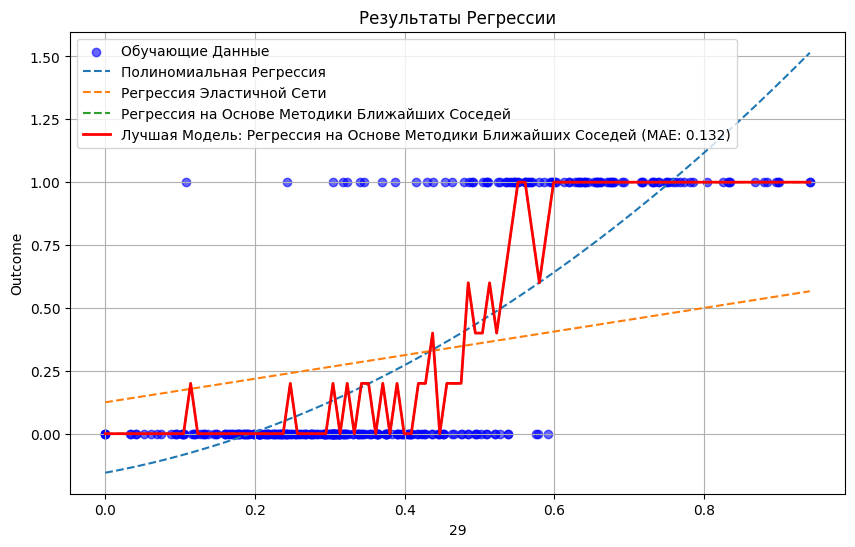

Построение результатов для признака: 25


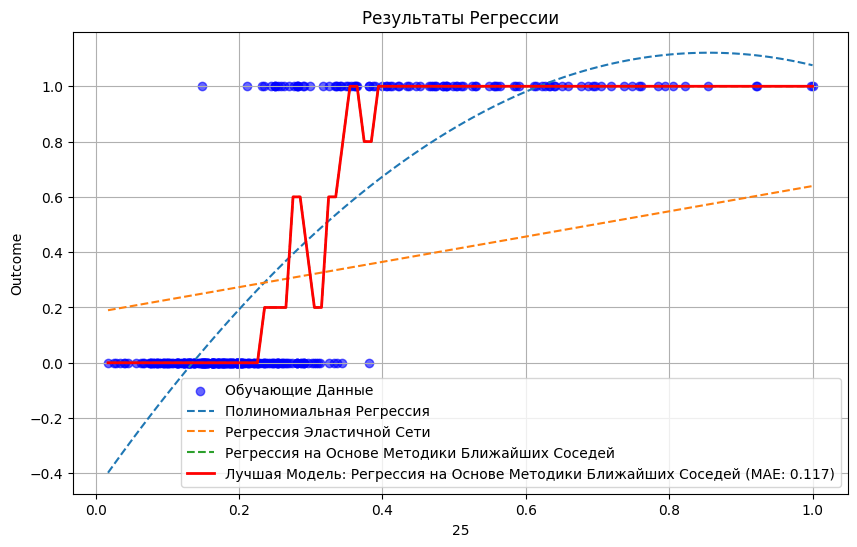

Построение результатов для признака: 2


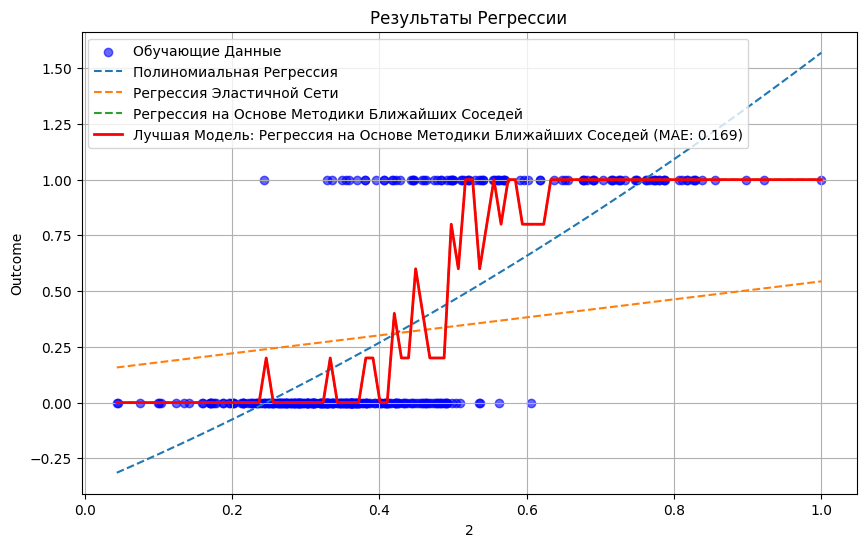

In [172]:
feature_names = final_data.columns
target_name = 'Outcome'
models = [best_poly_model, grid_elastic.best_estimator_, best_knn_model]
model_names = ["Полиномиальная Регрессия", "Регрессия Эластичной Сети", "Регрессия на Основе Методики Ближайших Соседей"]

# Визуализация для каждого признака
for i, feature in enumerate(feature_names):
    X_train_feature = X_train.iloc[:, i].values.reshape(-1, 1)
    X_test_feature = X_test.iloc[:, i].values.reshape(-1, 1)
    print(f"Построение результатов для признака: {feature}")
    plot_regression_results(X_train_feature, y_train, X_test_feature, y_test, feature, target_name, models, model_names)

8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import learning_curve

In [174]:
colors = ['blue', 'green', 'purple', 'orange', 'red']

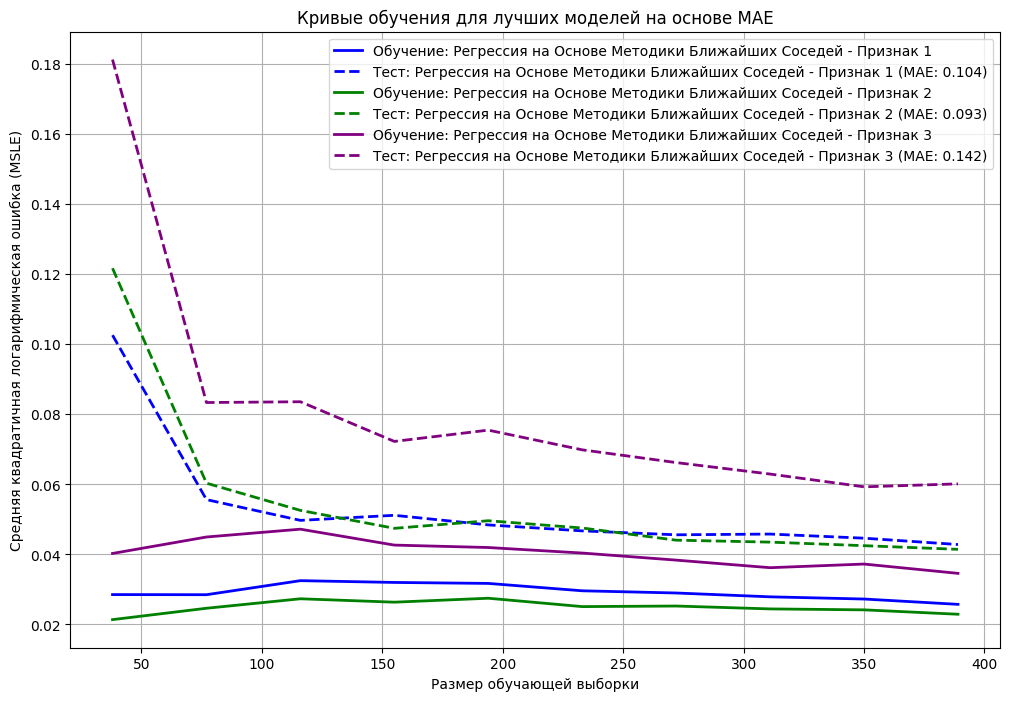

In [175]:
# Функция для построения кривых обучения для лучшей модели на основе MAE
def plot_learning_curves(X_list, y, models, model_names):
    plt.figure(figsize=(12, 8))

    for i, X in enumerate(X_list):
        best_mae = float('inf')
        best_model_index = None
        # Поиск лучшей модели на основе MAE для признака
        for j, model in enumerate(models):
            model.fit(X, y)
            model_mae = mean_absolute_error(y, model.predict(X))
            if model_mae < best_mae:
                best_mae = model_mae
                best_model_index = j

        # Kривые обучения для лучшей модели
        best_model = models[best_model_index]
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=best_model, X=X, y=y,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1
        )

        # Cредние значения для обучающих и тестовых оценок (обратим знак для получения положительных значений)
        train_scores_mean = -train_scores.mean(axis=1)
        test_scores_mean = -test_scores.mean(axis=1)
        color = colors[i % len(colors)]

        # Kривые обучения для лучшей модели с использованием разных цветов
        plt.plot(train_sizes, train_scores_mean, color=color, linestyle='-', linewidth=2,
                 label=f'Обучение: {model_names[best_model_index]} - Признак {i+1}')
        plt.plot(train_sizes, test_scores_mean, color=color, linestyle='--', linewidth=2,
                 label=f'Тест: {model_names[best_model_index]} - Признак {i+1} (MAE: {best_mae:.3f})')


    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Средняя квадратичная логарифмическая ошибка (MSLE)')
    plt.title('Кривые обучения для лучших моделей на основе MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

feature_names = final_data.columns
X_list = [X.iloc[:, i].values.reshape(-1, 1) for i in range(len(feature_names))]
models = [best_poly_model, grid_elastic.best_estimator_, best_knn_model]
model_names = ["Полиномиальная Регрессия", "Регрессия Эластичной Сети", "Регрессия на Основе Методики Ближайших Соседей"]

plot_learning_curves(X_list, y, models, model_names)